# Investigate a Dataset (TMDb Movie Data)


### The objective of the project is to go through the dataset and the general data analysis process using numpy, pandas and matplotlib.

#### Table of Contents:

  -Introduction
  
  -Data Wrangling
  
  -Exploratory Data Analysis
  
  -Conclusions

### Introduction 

#### I will work with the data set that I selected and the process is :
  -Ask questions
  
  -Data Wrangling
  
  -Exploratory Data Analysis
  
  -Conclusions 

### At first ...
#### I selected the movies data set from Kaggle. The data set consists of 10,000 movies. The data recorded budget, ratings, and revenue.


#### STEP1: Ask questions :
-What is the highest grossing movies with the lowest budget? 

-What is the kind of movies that require a high budget in general?

-In the recent five years which revenue was the highest?
 
-What are the kind of movies in which the rate of votes is higher than others in the recent five years.?

-what is the highest Earning Film Production Companies in recent five years? 
What is the relationship between budget and runtime?

#### STEP2: Data Wrangling 
In this step, I imported and checked the data.. Then I cleaned the data based on the questions asked



In [22]:
# Import statements for all of the packages that I will need.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [23]:
 # Use pd.read_csv to load the movie dataset.
# md: movie database (data frame)

md= pd.read_csv('moviesdata11.csv')
md.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
# To count and find out the shape of the table. 
md.shape

(10866, 21)

In [4]:
# and for more details
md.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


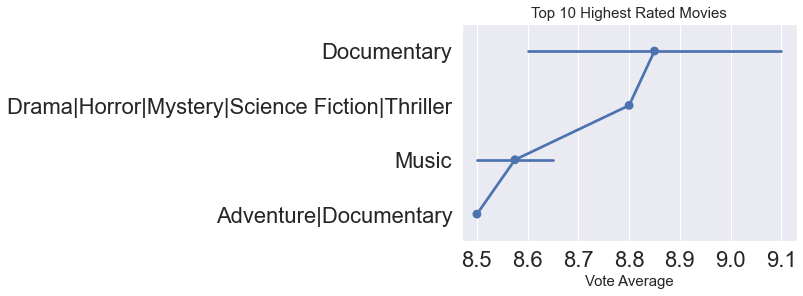

In [165]:
info = pd.DataFrame(md['vote_average'].sort_values(ascending = False))
info['genres'] = md['genres']
data = list(map(str,(info['genres'])))

##extract the top 10 highly rated movies data from the list and dataframe.
x = list(data[:10])
y = list(info['vote_average'][:10])

#make the point plot and setup the title and labels.
ax = sns.pointplot(x=y,y=x)
sns.set(rc={'figure.figsize':(10,5)})
ax.set_title("Top 10 Highest Rated Movies",fontsize = 15)
ax.set_xlabel("Vote Average",fontsize = 15)
#setup the stylesheet
sns.set_style("darkgrid")


In [166]:

#Get a list of the top 10 movies
md_top10 = md.nlargest(10,'vote_average')

md.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


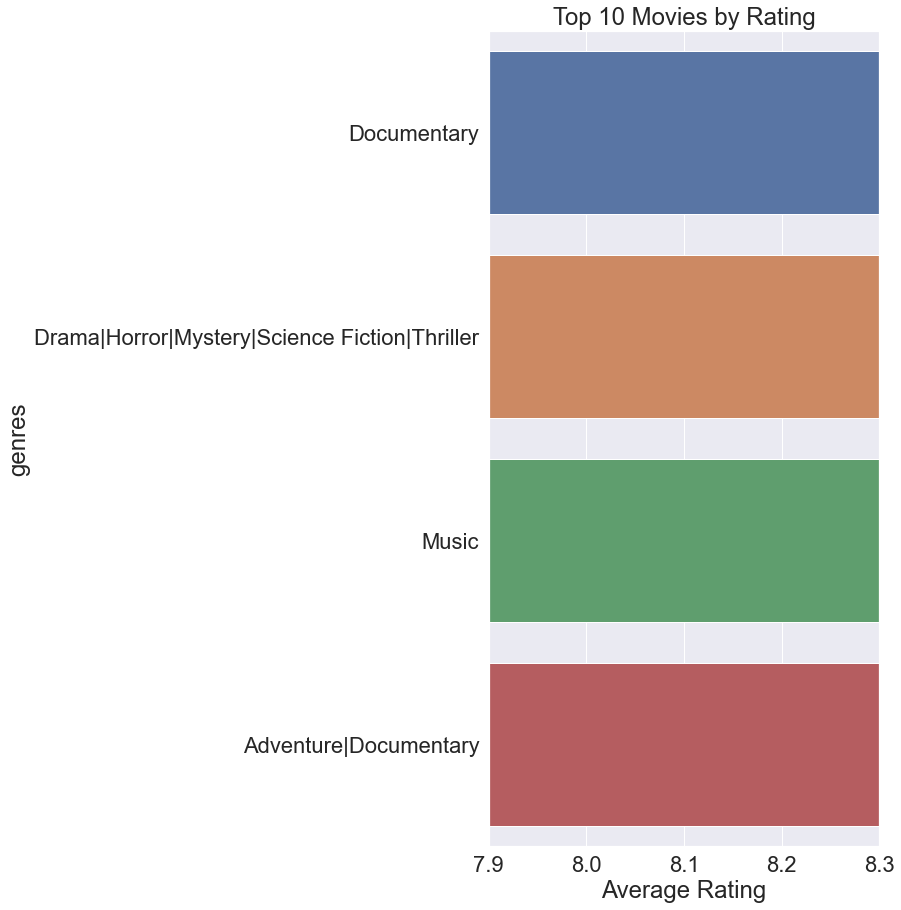

In [7]:
#Plot the top 10 movies
sns.set(style="whitegrid");
sns.set(font_scale=2);
f, ax = plt.subplots(figsize=(7, 15));
ax = sns.barplot(x='vote_average', y='genres', data=md_top10);

ax.set(xlim=(7.9,8.3), ylabel="genres", xlabel="Average Rating");
plt.title('Top 10 Movies by Rating');

In [8]:
print(max(md['vote_average']))

9.2


In [9]:
profit_x = profit_average_max[1:].value_counts().index.values.tolist()
profit_y = profit_average_max[1:].value_counts().tolist()
graph = plt.bar(profit_x, profit_y)

plt.title('Number of Years Genres Have the Highest Average Profit')
plt.xticks(rotation = 'vertical')
plt.yticks([0, 5, 10, 15, 20])
plt.xlabel('Movie Genres')
plt.ylabel('Number of Years')

# Place the values above the bars.
for p in graph.patches:
    plt.annotate(p.get_height(), (p.get_x() + p.get_width() / 2, p.get_height()), ha = 'center', va = 'center', fontsize = 11, xytext = (0, 10), textcoords = 'offset points')

plt.show()

NameError: name 'profit_average_max' is not defined

In [167]:
md.genres.describe()

count      10843
unique      2039
top       Comedy
freq         712
Name: genres, dtype: object

In [168]:
md.genres.nunique()


2039

In [169]:
genre_array = md.genres.values
genre_array = genre_array.astype('U')
print(genre_array.dtype)

<U51


In [170]:
split_genre_array = np.core.defchararray.split(a = genre_array, sep = '|')


In [173]:
print(split_genre_array.dtype)
print(split_genre_array)


object
[list(['Action', 'Adventure', 'Science Fiction', 'Thriller'])
 list(['Action', 'Adventure', 'Science Fiction', 'Thriller'])
 list(['Adventure', 'Science Fiction', 'Thriller']) ...
 list(['Mystery', 'Comedy']) list(['Action', 'Comedy']) list(['Horror'])]


In [175]:
split_genre_array

array([list(['Action', 'Adventure', 'Science Fiction', 'Thriller']),
       list(['Action', 'Adventure', 'Science Fiction', 'Thriller']),
       list(['Adventure', 'Science Fiction', 'Thriller']), ...,
       list(['Mystery', 'Comedy']), list(['Action', 'Comedy']),
       list(['Horror'])], dtype=object)

In [178]:
md['runtime'].mean()


102.07086324314375

In [ ]:
small_df = md[['genres', 'vote_average']]
small_df[small_df['vote_average'] >= 7.5]


In [161]:
df_genres = md.groupby(['vote_average', 'genres']).count()['id'].unstack()
df_genres.head(5)

KeyError: 'vote_average'

In [16]:
md.groupby(['genres']).count()['id'].sort_values(ascending=False)


genres
Comedy                           712
Drama                            712
Documentary                      312
Drama|Romance                    289
Comedy|Drama                     280
                                ... 
Drama|Western|War|Romance          1
Family|Action|Adventure            1
Family|Action|Drama                1
Family|Action|Science Fiction      1
Drama|Action|War|History           1
Name: id, Length: 2039, dtype: int64

In [ ]:
f,ax=plt.subplots(figsize=(20, 10))
md[['genres', 'vote_average']].groupby(['genres']).mean().sort_values(["vote_average"], ascending=False).plot(kind="bar",  ax=ax);
plt.xticks(rotation=75,fontsize=20)

ax.set(ylabel = 'Monetary Amount', title = 'Average Budget verses Average Revenue for Genres')

plt.show()

In [160]:
md.genres.nunique()


AttributeError: 'DataFrame' object has no attribute 'genres'

In [ ]:
for i in sorted_revenue.index:
    titles(md.loc[i,'production_companies'])
    revenues.append(sorted_revenue.loc[i])
high_grossers['Titles']=titles
high_grossers['Revenues']=revenues
high_grossers.set_index('Titles',inplace=True)
high_grossers.plot(kind ='bar',figsize=(8,8))
plt.title('Top 20 highest grossing movies (1965 - 2015) ');
plt.ylabel('Revenue in billions ($)');

In [ ]:
mg= md.groupby('genres')['vote_average'].mean()
mg.plot(kind='bar',alpha =.7, figsize=(15,6))
plt.xlabel("genres", figsize=18);
plt.ylabel("rating", figsize=18);
plt.xticks(fontsize=15)
plt.title('average', fontsize=18)
plt.grid(True)


In [25]:
info= md.groupby('genres')['vote_average'].mean()
info

genres
Action                                      5.526984
Action|Adventure                            5.333333
Action|Adventure|Animation                  6.775000
Action|Adventure|Animation|Comedy|Drama     5.600000
Action|Adventure|Animation|Comedy|Family    6.100000
                                              ...   
Western|Drama|Crime|Romance                 5.800000
Western|History                             6.000000
Western|History|War                         5.900000
Western|Horror|Thriller                     4.400000
Western|Thriller                            5.700000
Name: vote_average, Length: 2039, dtype: float64

In [27]:
info.plot(kind='bar',alpha =0.7)
plt.xlabel("genres", fontsize=1);
plt.ylabel("rating", fontsize=12);
plt.title('average', fontsize=12)
plt.grid(True)


Error in callback <function flush_figures at 0x7faa851883a0> (for post_execute):


KeyboardInterrupt: 

In [43]:
fd = md.sort_values(by = 'revenue_adj',ascending = False).loc[:,['revenue_adj', 'production_companies']][0:10]


In [44]:
sorted_revenue = md['revenue_adj'].sort_values(ascending=False)[:20]
high_grossers= md.DataFrame()
titles=[]
revenues=[]



AttributeError: 'DataFrame' object has no attribute 'DataFrame'

In [42]:
plt['fd'].plot(kind="barh")
plt.title("Mince Pie Consumption Study Results")
plt.ylabel("Family Member")
plt.xlabel("Pies Consumed")

TypeError: 'module' object is not subscriptable

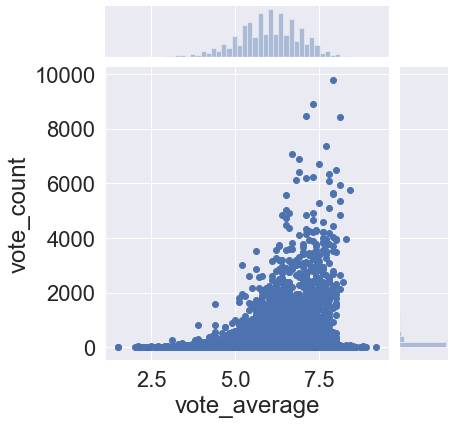

In [52]:
sns.jointplot(x='vote_average',y='vote_count', data = md)

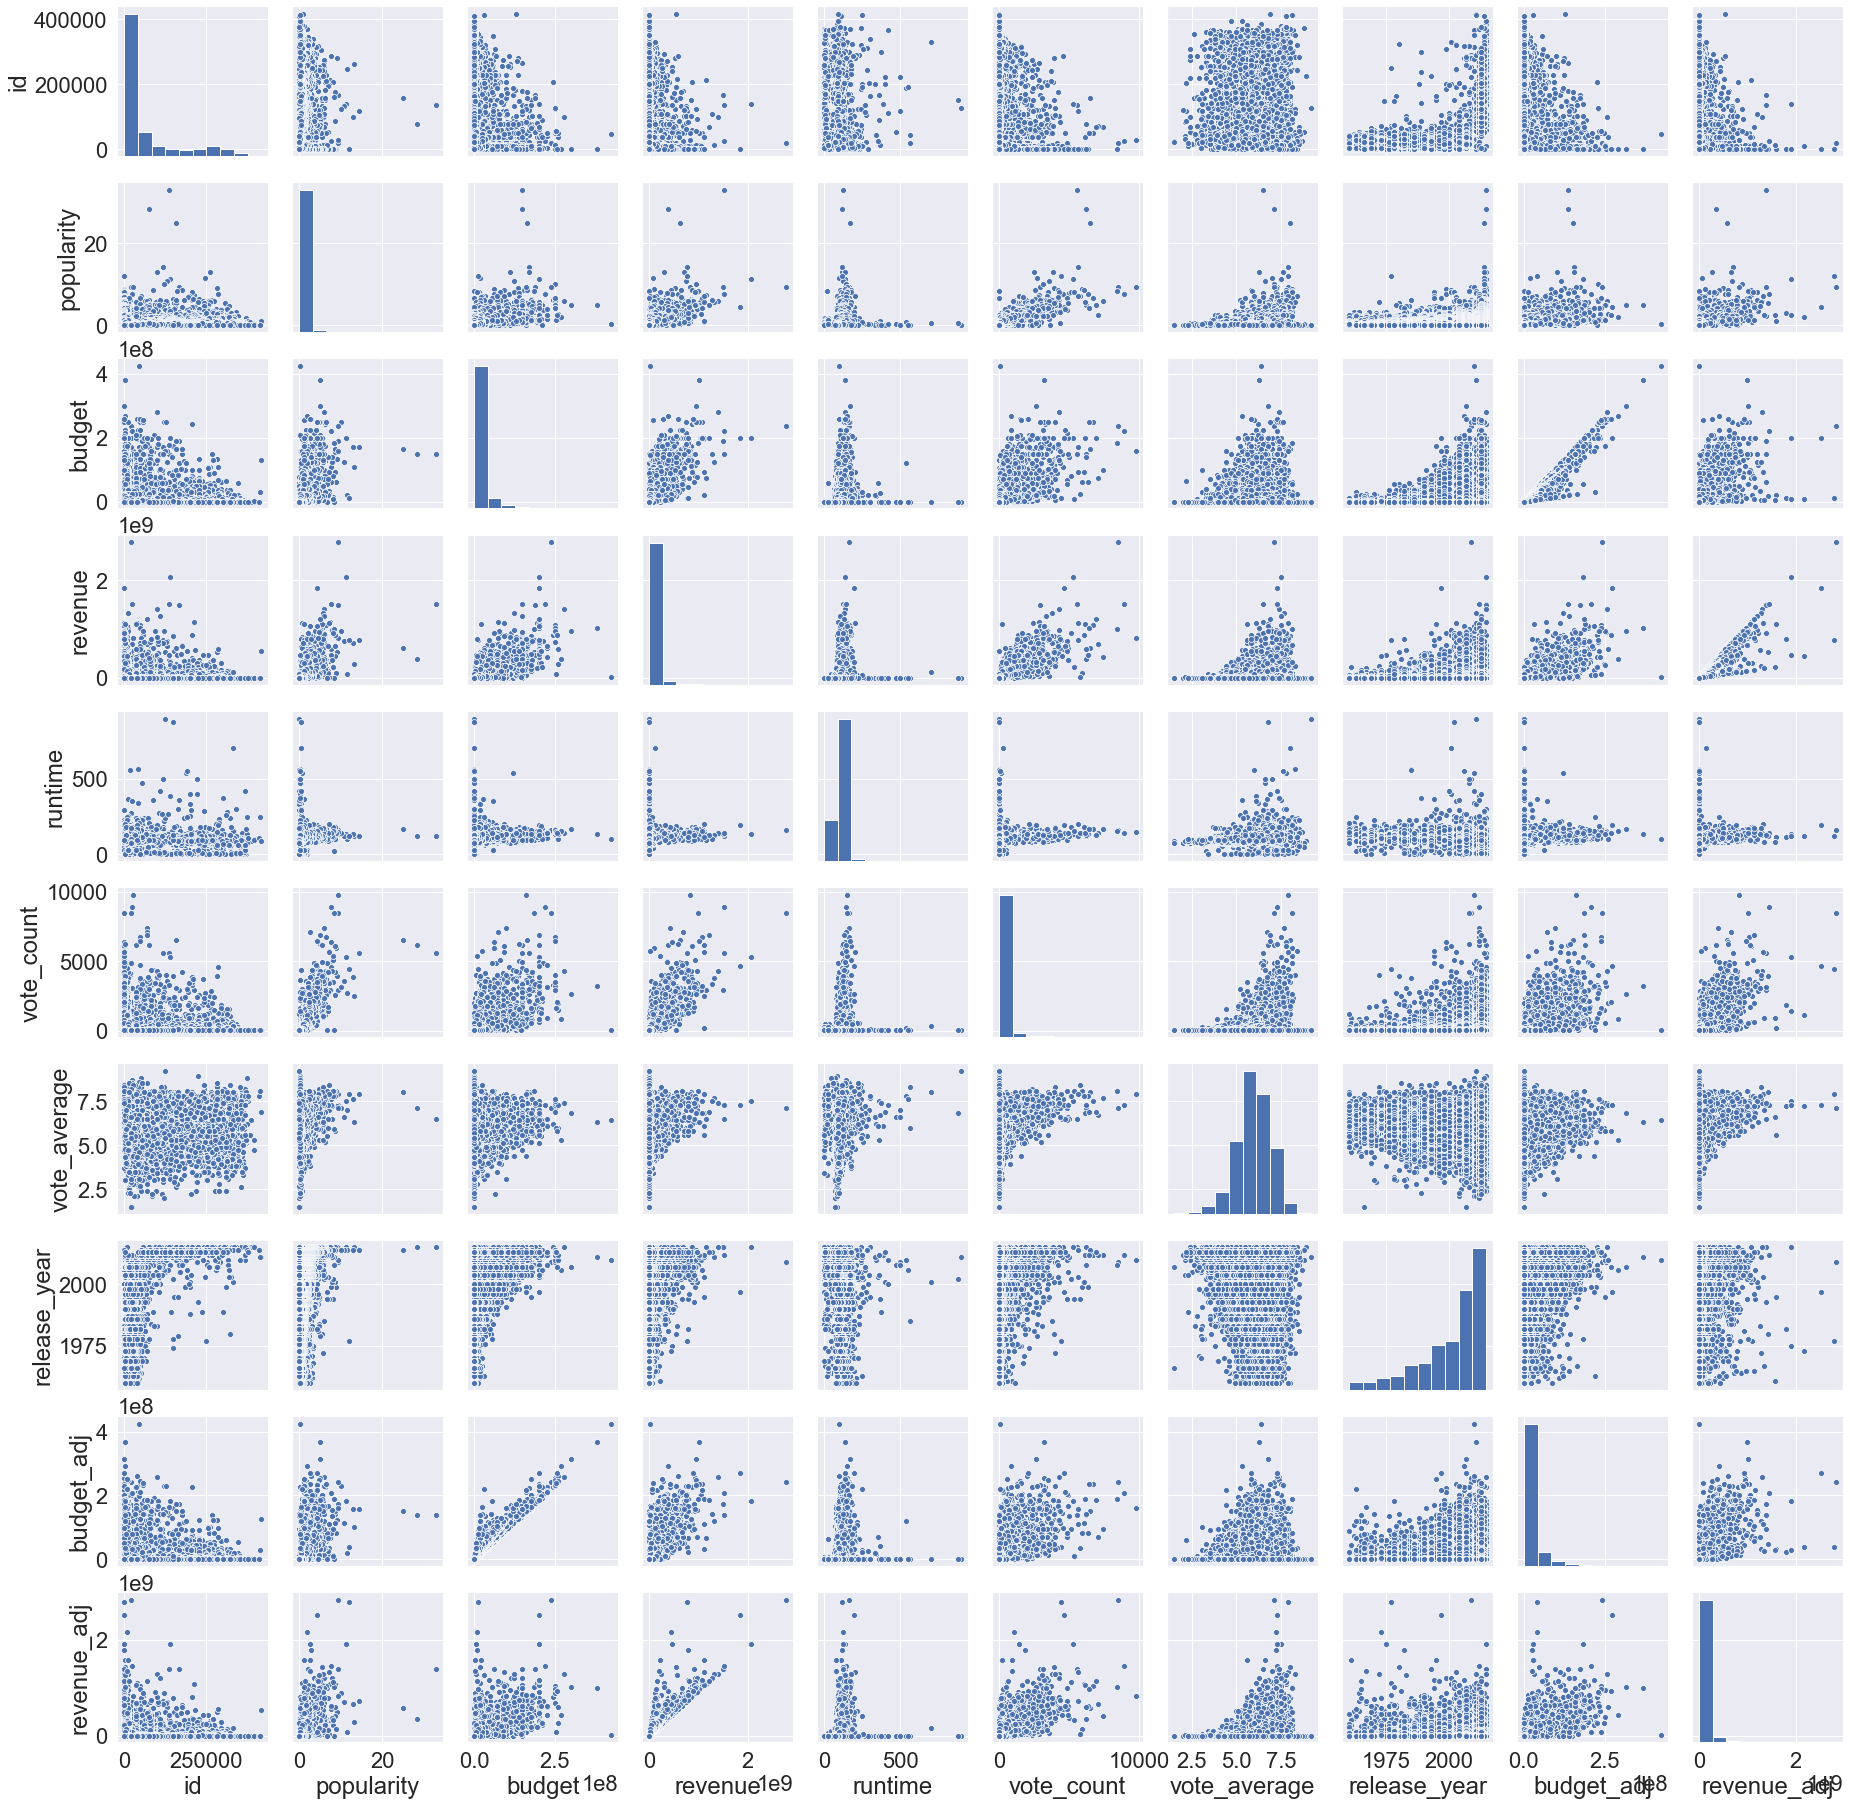

In [53]:
sns.pairplot(md)

In [ ]:
cd= pd.read_csv('moviesdata11.csv')


In [155]:
md_clean = pd.read_csv('cleaned_md.csv')
md_clean.head()

,budget,revenue,runtime,genres,production_companies,vote_average,release_year,budget_adj,revenue_adj
0,150000000.0,1.513529e+09,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6.5,2015,1.379999e+08,1.392446e+09
1,150000000.0,3.784364e+08,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,7.1,2015,1.379999e+08,3.481613e+08
2,110000000.0,2.952382e+08,119.0,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,6.3,2015,1.012000e+08,2.716190e+08
3,200000000.0,2.068178e+09,136.0,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,7.5,2015,1.839999e+08,1.902723e+09
4,190000000.0,1.506249e+09,137.0,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,7.3,2015,1.747999e+08,1.385749e+09


In [156]:
md_clean['genres'].unique()

array(['Action|Adventure|Science Fiction|Thriller',
       'Adventure|Science Fiction|Thriller',
       'Action|Adventure|Science Fiction|Fantasy',
       'Action|Crime|Thriller', 'Western|Drama|Adventure|Thriller',
       'Science Fiction|Action|Thriller|Adventure',
       'Drama|Adventure|Science Fiction',
       'Family|Animation|Adventure|Comedy', 'Comedy|Animation|Family',
       'Action|Adventure|Crime',
       'Science Fiction|Fantasy|Action|Adventure',
       'Drama|Science Fiction', 'Action|Comedy|Science Fiction',
       'Action|Adventure|Science Fiction', 'Crime|Drama|Mystery|Western',
       'Crime|Action|Thriller', 'Science Fiction|Action|Adventure',
       'War|Adventure|Science Fiction',
       'Action|Family|Science Fiction|Adventure|Mystery',
       'Action|Drama|Thriller', 'Drama|Romance', 'Comedy|Drama', 'Action',
       'Crime|Comedy|Action|Adventure', 'Drama|Thriller|History',
       'Action|Science Fiction|Thriller', 'Crime|Action|Science Fiction',
       'Adventu

In [71]:
s = md_clean['genres'].str.split('|').apply(genres, 1).stack()
s.index = s.index.droplevel(-1)
s.name = 'genres'

df_new = md_clean.copy() # create a copy of the df_clean dataset 
del df_new['genres']

df = df_new.join(s)

NameError: name 'genres' is not defined

In [77]:
md_clean['genres'].value_counts()


Drama                                      76
Comedy                                     69
Drama|Romance                              37
Comedy|Romance                             30
Comedy|Drama|Romance                       29
                                           ..
Adventure|Fantasy|Family|Mystery            1
Drama|Thriller|Crime|Mystery                1
Adventure|Drama|History                     1
Comedy|Fantasy|Science Fiction              1
Fantasy|Action|Science Fiction|Thriller     1
Name: genres, Length: 496, dtype: int64

In [75]:
genres_movies = pd.merge(md_clean , genres , how = 'inner' , on = 'id')


NameError: name 'genres' is not defined

In [80]:
genres.duplicate()

NameError: name 'genres' is not defined

In [154]:
hl= md.agg('genres')


AttributeError: 'genres' is not a valid function for 'DataFrame' object

In [121]:
 hl.isnull().sum()

23

In [122]:
gh.head(40)

,index,genres
0,0,Action|Adventure|Science Fiction|Thriller
1,1,Action|Adventure|Science Fiction|Thriller
2,2,Adventure|Science Fiction|Thriller
3,3,Action|Adventure|Science Fiction|Fantasy
4,4,Action|Crime|Thriller
5,5,Western|Drama|Adventure|Thriller
6,6,Science Fiction|Action|Thriller|Adventure
7,7,Drama|Adventure|Science Fiction
8,8,Family|Animation|Adventure|Comedy
9,9,Comedy|Animation|Family


In [151]:
genres.isnull().sum()

NameError: name 'genres' is not defined

In [152]:
def data(column):
    #will take a column, and separate the string by '|'
    data = md[column].str.cat(sep = '|')
    
    #giving pandas series and storing the values separately
    data = pd.Series(data.split('|'))
    
    #arranging in descending order
    count = data.value_counts(ascending = False)
    
    return count

In [44]:
count = data('genres')
#printing top 5 values
count.head(20)

AttributeError: 'function' object has no attribute 'split'

In [130]:
count.min()

165

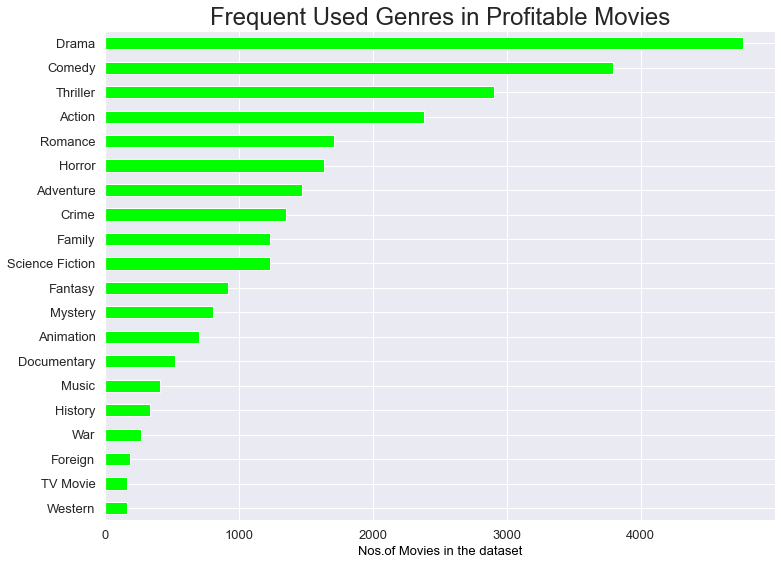

In [114]:
count.sort_values(ascending = True, inplace = True)

#ploting
lt = count.plot.barh(color = '#00FF00', fontsize = 13)

#title
lt.set(title = 'Frequent Used Genres in Profitable Movies')

# on x axis
lt.set_xlabel('Nos.of Movies in the dataset', color = 'black', fontsize = '13')

#figure size(width, height)
lt.figure.set_size_inches(12, 9)

#ploting the graph
plt.show()

# .........................................................................

In [52]:
md['runtime'].mean()


102.07086324314375

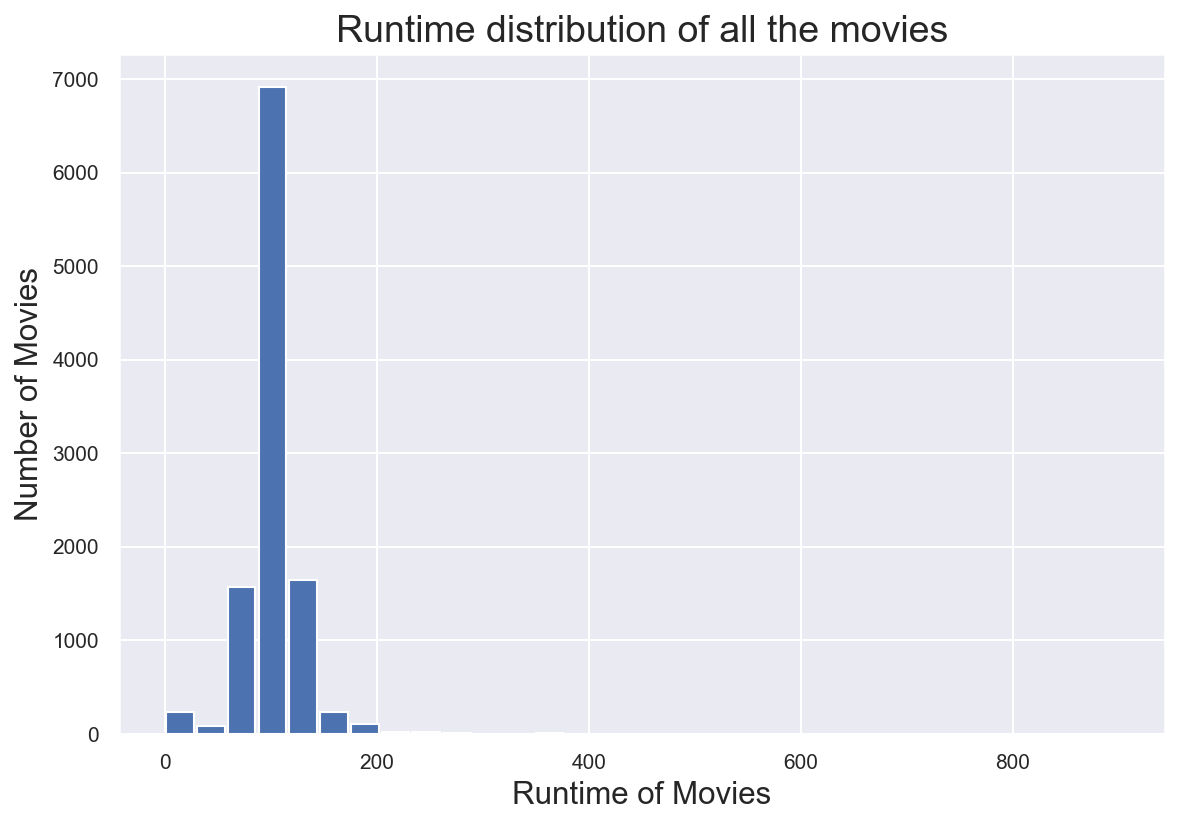

In [197]:
#gives styles to bg plot
sns.set_style('darkgrid')

#chaging the label size, this will change the size of all plots that we plot from now!
plt.rc('xtick', labelsize = 10)
plt.rc('ytick', labelsize = 10)

#giving the figure size(width, height)
plt.figure(figsize=(9,6), dpi = 150)
#x-axis label name
plt.xlabel('Runtime of Movies', fontsize = 15)
#y-axis label name
plt.ylabel('Number of Movies', fontsize=15)
#title of the graph
plt.title('Runtime distribution of all the movies', fontsize=18)

#giving a histogram plot
plt.hist(md['runtime'], rwidth = 0.9, bins =31)
#displays the plot
plt.show()

# ...................................................................................

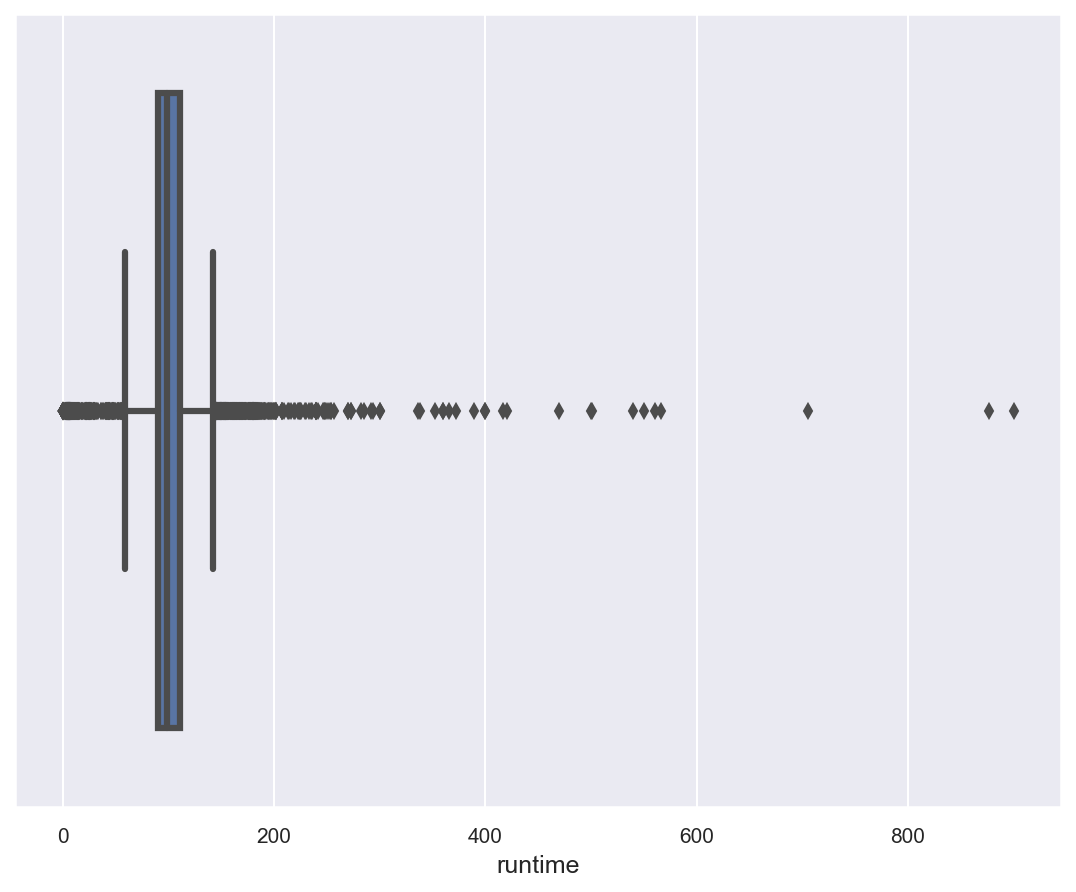

In [193]:
plt.figure(figsize=(9,7), dpi = 150)

#using seaborn to plot
#plotting box plot
sns.boxplot(md['runtime'], linewidth = 3)
#showing the plot
plt.show()

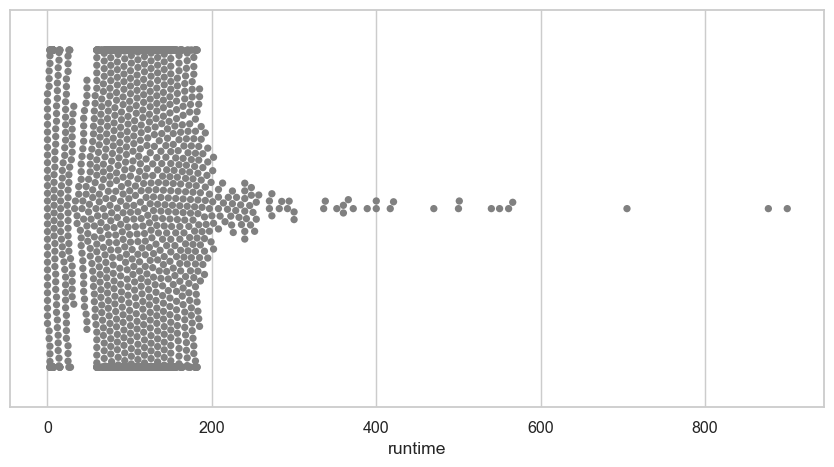

In [43]:
#giving figure size
plt.figure(figsize=(10,5), dpi = 105)

sns.swarmplot(md['runtime'], color = 'grey')
plt.show()

In [203]:

profits_each_year = md.groupby('release_year')['profit_(in_US_Dollars)'].sum()


KeyError: 'Column not found: profit_(in_US_Dollars)'

In [205]:
def highest_lowest(column_name):
    
    #highest
    #taking the index value of the highest number in profit column
    highest_id = md[column_name].idxmax()
    #calling by index number,storing that row info to a variable
    highest_details = pd.DataFrame(md.loc[highest_id])
    
    #lowest
    #same processing as above
    lowest_id = movie_data[column_name].idxmin()
    lowest_details = pd.DataFrame(movie_data.loc[lowest_id])
    
    #concatenating two dataframes
    two_in_one_data = pd.concat([highest_details, lowest_details], axis = 1)
    
    return two_in_one_data

#calling the function and passing the argument


In [31]:
change_coltype = ['budget', 'revenue']

md[change_coltype] = md[change_coltype].applymap(np.int64)
#shwoing the datatypes of all columns
md.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [208]:
md.rename(columns = {'budget' : 'budget_(in_US-Dollars)', 'revenue' : 'revenue_(in_US-Dollars)'}, inplace = True)


In [216]:


#showing the dataset
md.head(40)

,id,imdb_id,profit_(in_US_Dollars),popularity,budget_(in_US-Dollars),revenue_(in_US-Dollars),original_title,cast,homepage,director,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,1363528810,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,228436354,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,185238201,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,1868178225,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,1316249360,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,tt1663202,397950503,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,http://www.foxmovies.com/movies/the-revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,...,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08
6,87101,tt1340138,285603537,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,http://www.terminatormovie.com/,Alan Taylor,...,"The year is 2029. John Connor, leader of the r...",125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08
7,286217,tt3659388,487380321,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,http://www.foxmovies.com/movies/the-martian,Ridley Scott,...,"During a manned mission to Mars, Astronaut Mar...",141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08
8,211672,tt2293640,1082730962,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,http://www.minionsmovie.com/,Kyle Balda|Pierre Coffin,...,"Minions Stuart, Kevin and Bob are recruited by...",91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/15,2893,6.5,2015,6.807997e+07,1.064192e+09
9,150540,tt2096673,678708609,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,http://movies.disney.com/inside-out,Pete Docter,...,"Growing up can be a bumpy road, and it's no ex...",94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,6/9/15,3935,8.0,2015,1.609999e+08,7.854116e+08


In [37]:
def data(column):
    #will take a column, and separate the string by '|'
    ld = md[column].str.cat(sep = '|')
    
    #giving pandas series and storing the values separately
    ld = pd.Series(data.split('|'))
    
    #arranging in descending order
    ld = data.value_counts(ascending = False)
    
    return info

In [42]:
production_companies = data('profit_earned')

#plot he barh plot.
production_companies.iloc[:5].plot(kind='barh',figsize=(16,8),fontsize=13)
plt.title("Production Companies Vs Number Of Movies",fontsize=15)
plt.xlabel('Number Of Movies',fontsize=14)
sns.set_style("whitegrid")

KeyError: 'profit_earned'

In [30]:
md.insert(2,'profit_earned',md['revenue_(in_US-Dollars)']-md['budget_(in_US-Dollars)'])

#previewing the changes in the dataset
md.head(2)

KeyError: 'revenue_(in_US-Dollars)'

In [39]:
import pprint
#defining the function
def calculate(column):
    #for highest earned profit
    high= md[column].idxmax()
    high_details=pd.DataFrame(md.loc[high])
    
    
    #collectin data in one place
    info=pd.concat([high_details], axis=1)
    
    return info

#calling the function
calculate('profit_earned')

KeyError: 'profit_earned'

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


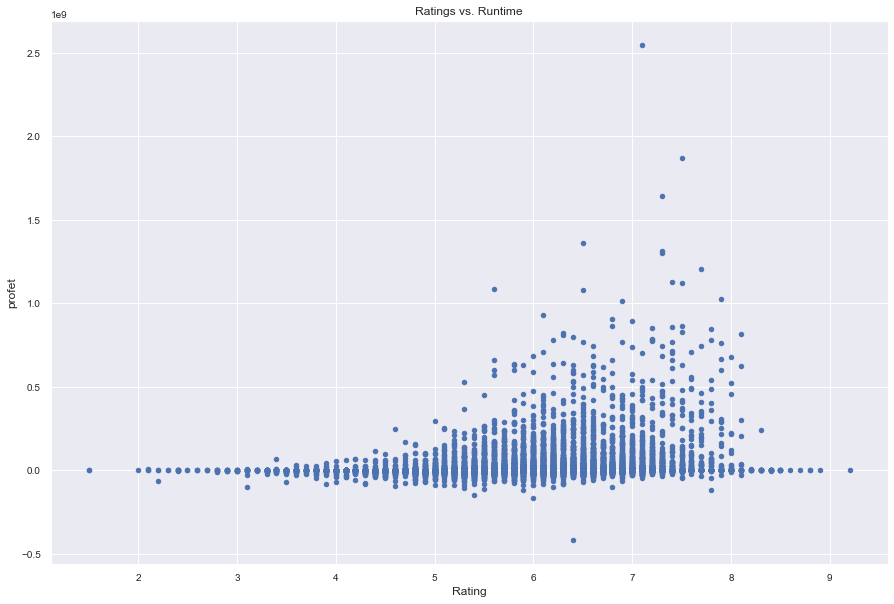

In [245]:
md.plot(x='vote_average', y='profit_(in_US_Dollars)', kind='scatter', figsize=(15,10))
plt.title('Ratings vs. Runtime')
plt.xlabel('Rating')
plt.ylabel('profet');

In [248]:
actor_dict = {}

actors = data["cast"]
actors = actors.str.split("|")
actors = np.array(actors)
for actorList in actors:
    #check if there is a problematic list which is just a float
    for actor in actorList:
        actor = actor.lstrip() #trim the whitespaces
        if actor not in actor_dict:
            actor_dict[actor] = 1
        else:
            actor_dict[actor] += 1
                


sorted_actor_dict = sorted(actor_dict.items(), key = operator.itemgetter(1), reverse = True)
#sorted_actor_dict[0:10]


x_axis = list()
y_axis = list()

for item in sorted_actor_dict[0:20]:
    x_axis.append(item[0])
    y_axis.append(item[1])


sns.set(rc={'figure.figsize':(12,10)}, font_scale=1.4)
ax = sns.barplot(x_axis, y_axis, palette="Set3")


#rotate x-axis' text
for item in ax.get_xticklabels():
    item.set_rotation(85)
    

ax.set(xlabel='actor names', ylabel='number of appearances', title = 'Top 20 actors based on the number of the appearances in movies')
plt.show()


TypeError: 'function' object is not subscriptable

In [251]:
md['production_companies'].value_counts()[0:10]


Paramount Pictures                        156
Universal Pictures                        133
Warner Bros.                               84
Walt Disney Pictures                       76
Metro-Goldwyn-Mayer (MGM)                  72
Columbia Pictures                          72
New Line Cinema                            61
Touchstone Pictures                        51
20th Century Fox                           50
Twentieth Century Fox Film Corporation     49
Name: production_companies, dtype: int64

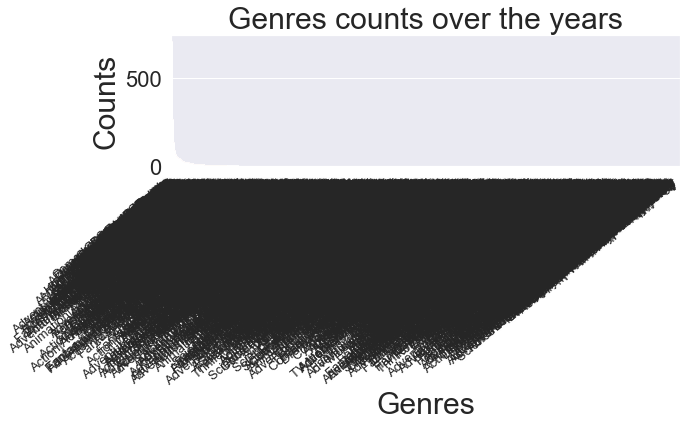

In [20]:
plt.figure(figsize = (10,6)) #set a figure size
ax = sns.countplot(x="genres", data= md, order = md['genres'].value_counts().index) #plots bar graph for genres
#rotate x-tick labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right",fontsize = 13)
plt.tight_layout()
#gives names to x-axis , y-axis & the title
plt.xlabel('Genres' , fontsize = 30)
plt.ylabel('Counts' , fontsize = 30)
plt.title('Genres counts over the years',fontsize = 30)
plt.show()

In [28]:
plt.figure(figsize = (40,20))
#Bar plot for no.of movies released every month
ax=sns.countplot(x = 'release_year', data = md,order = md['production_companies'].value_counts().index);
#rotate x ticklabels
ax.set_xticklabels(ax.get_xticklabels(),rotation = 40, ha= 'right', fontsize = 12);
#gives names to x-axis , y-axis & the title
plt.xlabel('Release Month', fontsize = 18);
plt.ylabel('Frequency',fontsize = 18);
plt.title('No.of Movies released every month',fontsize = 18);

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7f89651444c0> (for post_execute):


KeyboardInterrupt: 

In [29]:
movies_cast_sortedby_grossprofit=md.groupby('production_companies').sum().sort_values(by = 'profit_(in_US_Dollars)' 
                                                                                      , ascending = False )[0:10]

#get cast column back in dataframe

#set figure size
plt.figure(figsize=(10,8))
ab=sns.barplot(x = 'production_companies', y ='profit_(in_US_Dollars)',data =movies_cast_sortedby_grossprofit );
#Rotate Xtick labels
ab.set_xticklabels(ab.get_xticklabels(),rotation = 40, ha ='right', fontsize = 12 );
#Give labels to axis
plt.xlabel('Cast', fontsize = 18);
plt.ylabel('Gross Profit', fontsize = 18);
plt.title('High Profit earning cast', fontsize = 18);


KeyError: 'profit_(in_US_Dollars)'

In [32]:
production_companies = md('production_companies')

#plot he barh plot.
production_companies.iloc[:5].plot(kind='barh',figsize=(16,8),fontsize=13)
plt.title("Production Companies Vs Number Of Movies",fontsize=15)
plt.xlabel('Number Of Movies',fontsize=14)
sns.set_style("whitegrid")

TypeError: 'DataFrame' object is not callable

In [5]:
data=md.groupby('production_companies').count()['Release_year']
print(data.tail())

#make group of the data according to their release year and count the total number of movies in each year and pot.
md.groupby('production_companies').count()['Release_year'].plot(xticks = np.arange(1960,2016,5))

#set the figure size and labels
sns.set(rc={'figure.figsize':(10,5)})
plt.title("Year Vs Number Of Movies",fontsize = 14)
plt.xlabel('Release_year',fontsize = 13)
plt.ylabel('Number Of Movies',fontsize = 13)
#set the style sheet
sns.set_style("whitegrid")

KeyError: 'Release_year'

In [13]:
def production_company(x):
    #concatenate all the rows of the genrs.
    data_plot = md[x].str.cat(sep = '|')
    data = pd.Series(data_plot.split('|'))
    #conts each of the genre and return.
    info = data.value_counts(ascending=False)
    return info

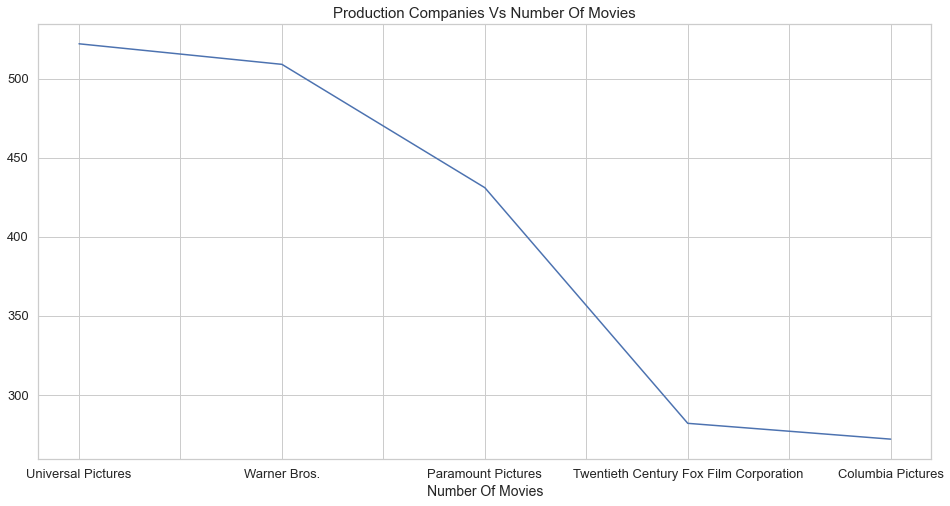

In [53]:
production_companies = production_company('production_companies')

#plot he barh plot.
production_companies.iloc[:5].plot(kind='line',figsize=(16,8),fontsize=13)
plt.title("Production Companies Vs Number Of Movies",fontsize=15)
plt.xlabel('Number Of Movies',fontsize=14)
sns.set_style("whitegrid")

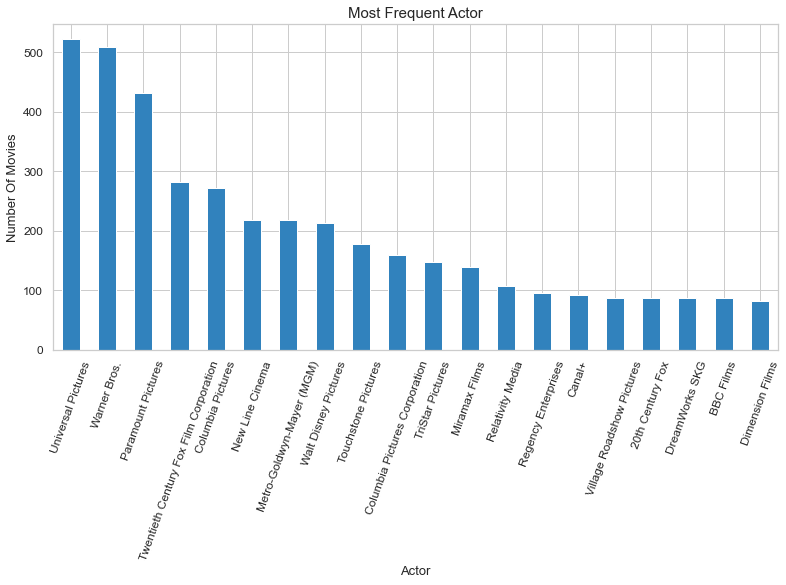

In [15]:
count_actor_flims = production_company('production_companies')

#plot the barh plot.
count_actor_flims.iloc[:20].plot.bar(figsize=(13,6),colormap= 'tab20c',fontsize=12)

#setup the title and the labels of the plot.
plt.title("Most Frequent Actor",fontsize=15)
plt.xticks(rotation = 70)
plt.xlabel('Actor',fontsize=13)
plt.ylabel("Number Of Movies",fontsize= 13)
sns.set_style("whitegrid")

In [17]:
md['production_companies'].value_counts()[0:10]


Paramount Pictures                        156
Universal Pictures                        133
Warner Bros.                               84
Walt Disney Pictures                       76
Columbia Pictures                          72
Metro-Goldwyn-Mayer (MGM)                  72
New Line Cinema                            61
Touchstone Pictures                        51
20th Century Fox                           50
Twentieth Century Fox Film Corporation     49
Name: production_companies, dtype: int64

In [ ]:
def ld(x):
    #concatenate all the rows of the genrs.
    data_plot = md[x].str.cat(sep = '|')
    data = pd.Series(data_plot.split('|'))
    #conts each of the genre and return.
    info = data.sort_values(ascending=False)
    return info

In [26]:
count_actor_flims = ld('runtime')

#plot the barh plot.
count_actor_flims.iloc[:20].plot.bar(figsize=(13,6),colormap= 'tab20c',fontsize=12)

#setup the title and the labels of the plot.
plt.title("Most Frequent Actor",fontsize=15)
plt.xticks(rotation = 70)
plt.xlabel('Actor',fontsize=13)
plt.ylabel("Number Of Movies",fontsize= 13)
sns.set_style("whitegrid")

AttributeError: Can only use .str accessor with string values!

In [40]:
movies_cast_sortedby_popularity=md.groupby('cast').sum().sort_values(by = 'popularity' , ascending = False )[0:10]


In [41]:
#set figure size
plt.figure(figsize=(10,8))
ab=sns.barplot(x = 'cast', y ='popularity',data =movies_cast_sortedby_popularity );
#Rotate x tick labels
ab.set_xticklabels(ab.get_xticklabels(),rotation = 40, ha ='right', fontsize = 12 );
#Give labels to axis
plt.xlabel('Cast', fontsize = 18);
plt.ylabel('Popularity Score', fontsize = 18);
plt.title('Most Famous Actors by Popularity Score', fontsize = 18);

ValueError: Could not interpret input 'cast'

<Figure size 720x576 with 0 Axes>

In [50]:
sns.pairplot('md')

TypeError: 'data' must be pandas DataFrame object, not: <class 'str'>